## Importing the Libraries

In [21]:
import torch
from torchvision.models.detection import maskrcnn_resnet50_fpn
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

## Defining the Model

In [22]:
model = maskrcnn_resnet50_fpn(pretrained=True)
model.eval()

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(in

## Importing the Image

In [23]:
image = Image.open('/kaggle/input/catandlaptop/cat_laptop.jpg')

## Transforming Image to Tensor

In [24]:
transform = transforms.Compose([
            transforms.ToTensor()
])
image_tensor = transform(image).unsqueeze(0)

## Result

In [25]:
with torch.no_grad():
    prediction = model(image_tensor)

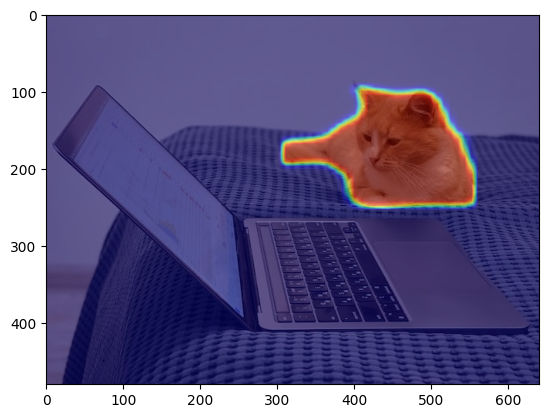

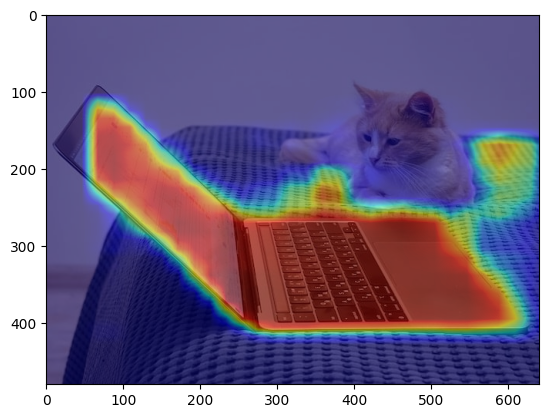

In [26]:
masks = prediction[0]["masks"]
labels = prediction[0]["labels"]
for i in range(2):
    plt.imshow(image)
    plt.imshow(
    masks[i, 0],
    cmap="jet",
    alpha=0.5,
    )
    plt.show()